In [28]:
import sqlite3
import pandas as pd
from IPython.display import display

connection = sqlite3.connect('../databases/takeaway.db')
cursor = connection.cursor()
cursor.execute('SELECT * from restaurants;')
# print(cursor.fetchall())

cursor.execute("""
    SELECT city, count(city) AS count_city
    FROM restaurants
    GROUP BY city
    ORDER BY count_city DESC;""")
city_count = cursor.fetchall()
df = pd.DataFrame(city_count)
# print(display(df. head(10)))

query = """ SELECT city, count(city) AS count_city
    FROM restaurants
    GROUP BY city
    ORDER BY count_city DESC;"""

city_count_df = pd.read_sql_query(query, connection)
print(city_count_df.head())

         city  count_city
0   Antwerpen         437
1        Gent         309
2   Bruxelles         264
3      Leuven         174
4  Schaerbeek         110


In [29]:
import plotly.express as px

fig =

In [30]:
# Load the raw contents of the GeoJSON file to examine its structure
import json

with open('georefpostal_codes.geojson', 'r') as file:
    geojson_content = json.load(file)

# Display the first part of the file to understand its structure
geojson_content.keys(), geojson_content['features'][0]


(dict_keys(['type', 'features']),
 {'type': 'Feature',
  'geometry': {'coordinates': [[[4.987858859000028, 50.13467433100004],
     [4.987859807000063, 50.13595897000005],
     [4.987748640000063, 50.13744657700005],
     [4.987137190000055, 50.13877032700003],
     [4.987057203000063, 50.139125335000074],
     [4.988040521000073, 50.14027967900006],
     [4.989176306000047, 50.140212820000045],
     [4.990370230000053, 50.14027979800005],
     [4.994947328000023, 50.14066926700008],
     [4.99763424300005, 50.141017875000045],
     [5.002217, 50.14155987200007],
     [5.004264718000059, 50.141833304000045],
     [5.005069935000051, 50.14217066200007],
     [5.005344273000048, 50.14248158400005],
     [5.006423283000061, 50.14421417700004],
     [5.006834347000051, 50.14417158600003],
     [5.007370407000053, 50.14518001300007],
     [5.005828438000037, 50.146295113000065],
     [5.005142659000057, 50.146691618000034],
     [5.004671647000066, 50.14817429000004],
     [5.00377173400005

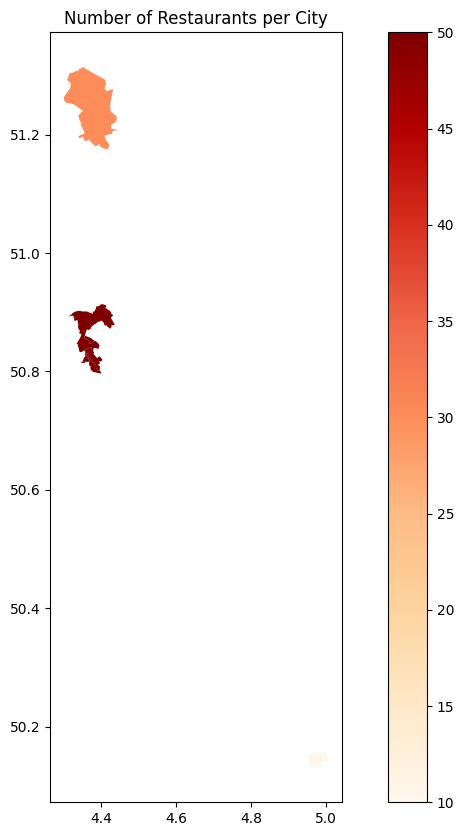

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON file as GeoDataFrame
geojson_path = 'georefpostal_codes.geojson'
geo_data = gpd.read_file(geojson_path)

# Extract relevant properties
geo_data = geo_data[['geometry', 'postcode']]  # Keep geometry and postcode

# Example city counts (replace with real data from your database)
city_counts = pd.DataFrame({
    'city': ['5571', '1000', '2000'],  # Example postal codes
    'restaurant_count': [10, 50, 30]   # Example counts
})

# Merge restaurant data with geo-spatial data on postal codes
merged_data = geo_data.merge(city_counts, left_on='postcode', right_on='city', how='inner')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='restaurant_count', cmap='OrRd', legend=True, ax=ax)
plt.title('Number of Restaurants per City')
plt.show()
